## Binary Classification Machine Learning Case Study Project

#### Problem Definition

#### Load the Dataset

In [29]:
# Load libraries
import matplotlib.pyplot as plt
import numpy as pd
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [30]:
# Load dataset
dataset = pd.read_csv('dataset/Sonar.csv')

#### Analyze Data

Descriptive Statistics

In [31]:
# shape
print(dataset.shape)

(208, 61)


In [32]:
# types
dataset.dtypes

V1       float64
V2       float64
V3       float64
V4       float64
V5       float64
          ...   
V57      float64
V58      float64
V59      float64
V60      float64
Class      int64
Length: 61, dtype: object

In [33]:
# head
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [34]:
# descriptions
dataset.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.466346
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,0.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


In [37]:
dataset.groupby('Class').size()

Class
0    111
1     97
dtype: int64

#### Data Visualization

Uni-model Data Visualization

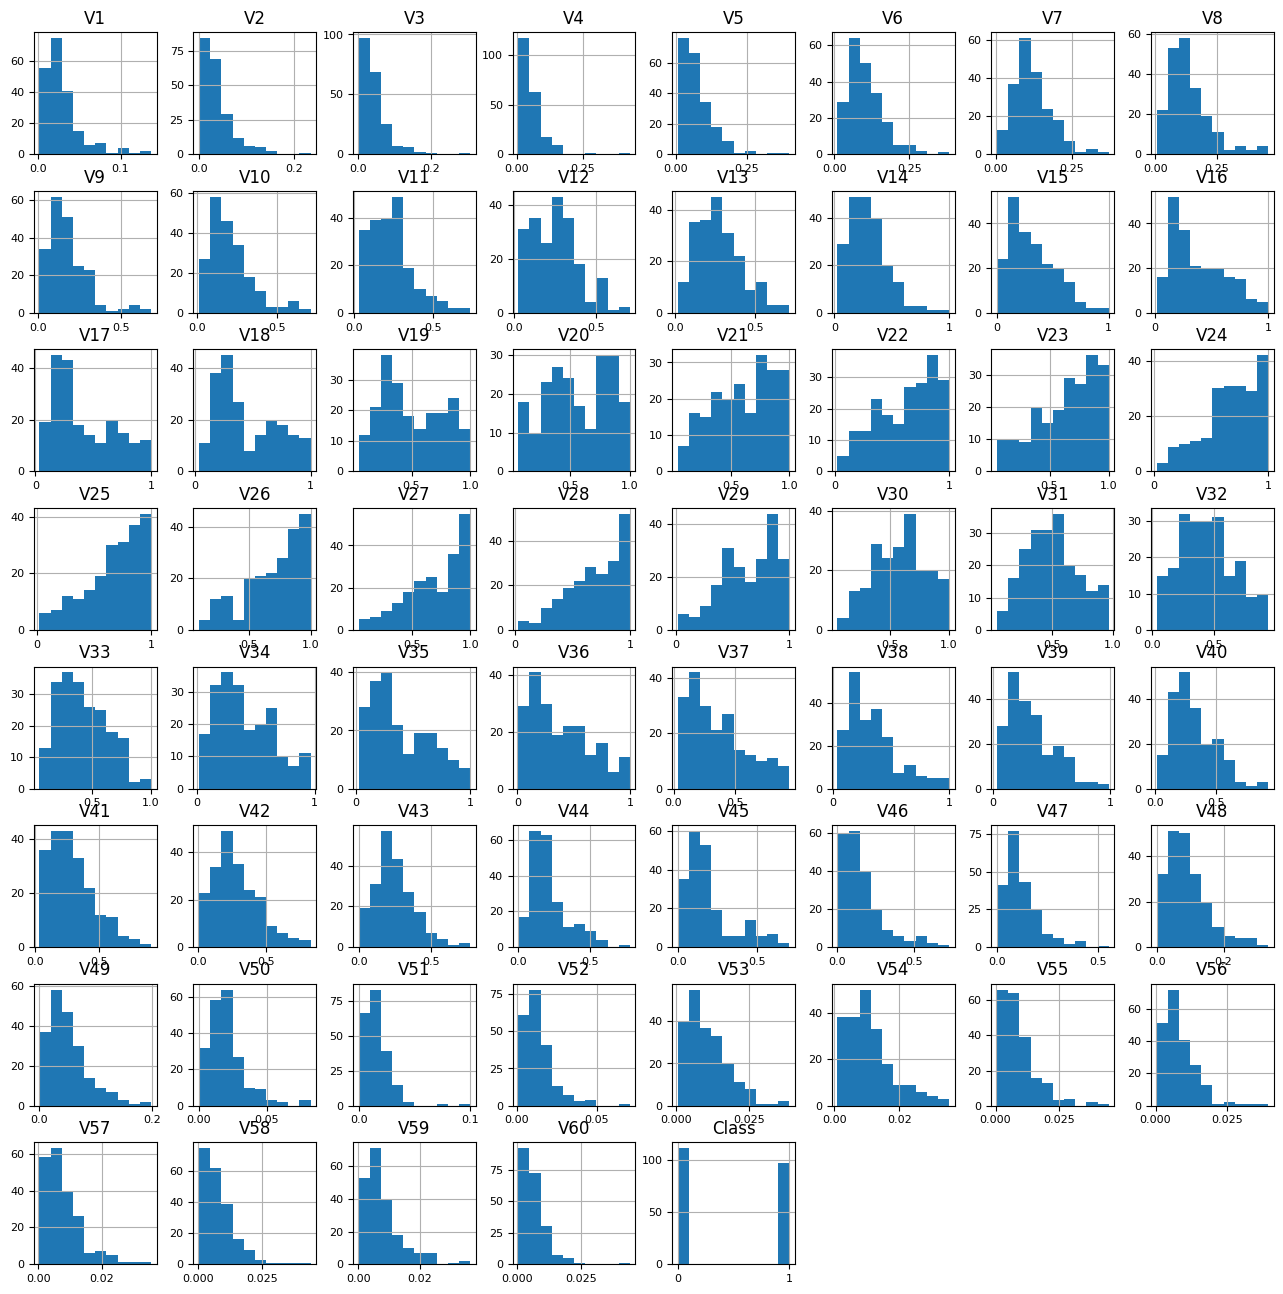

In [70]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=8, ylabelsize=8, figsize=(16, 16))
plt.show()

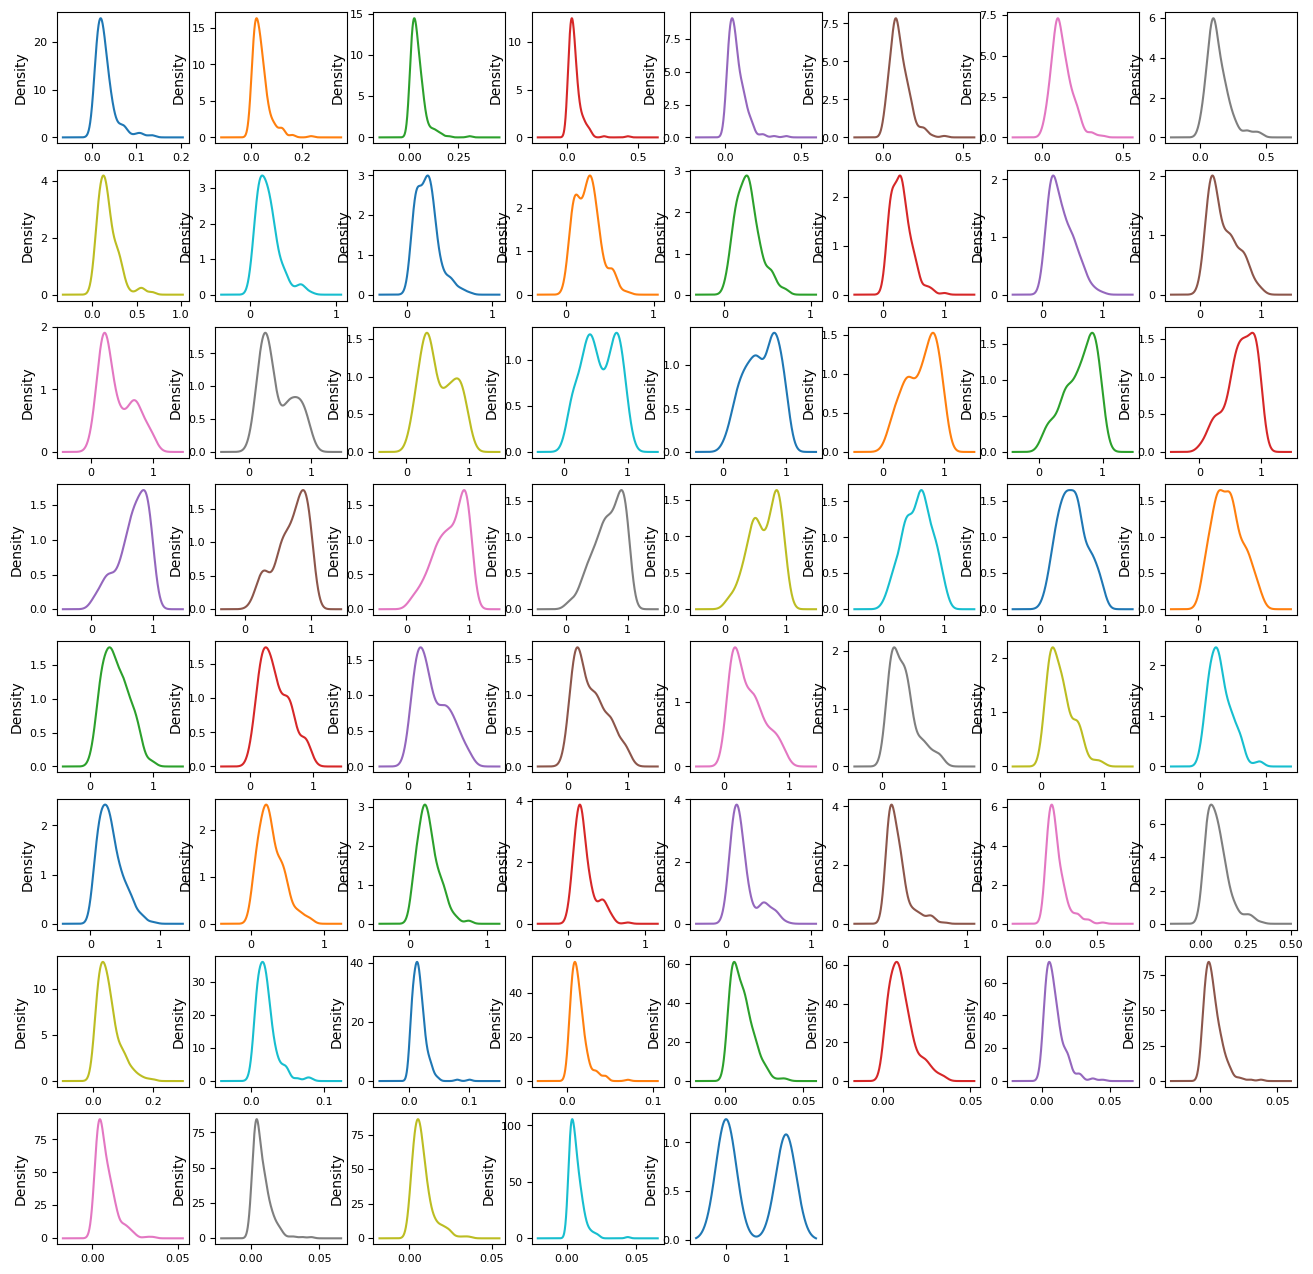

In [63]:
# density
dataset.plot(kind='density', subplots=True, layout=(8, 8), sharex=False, legend=False, fontsize=8, figsize=(16, 16))
plt.show()

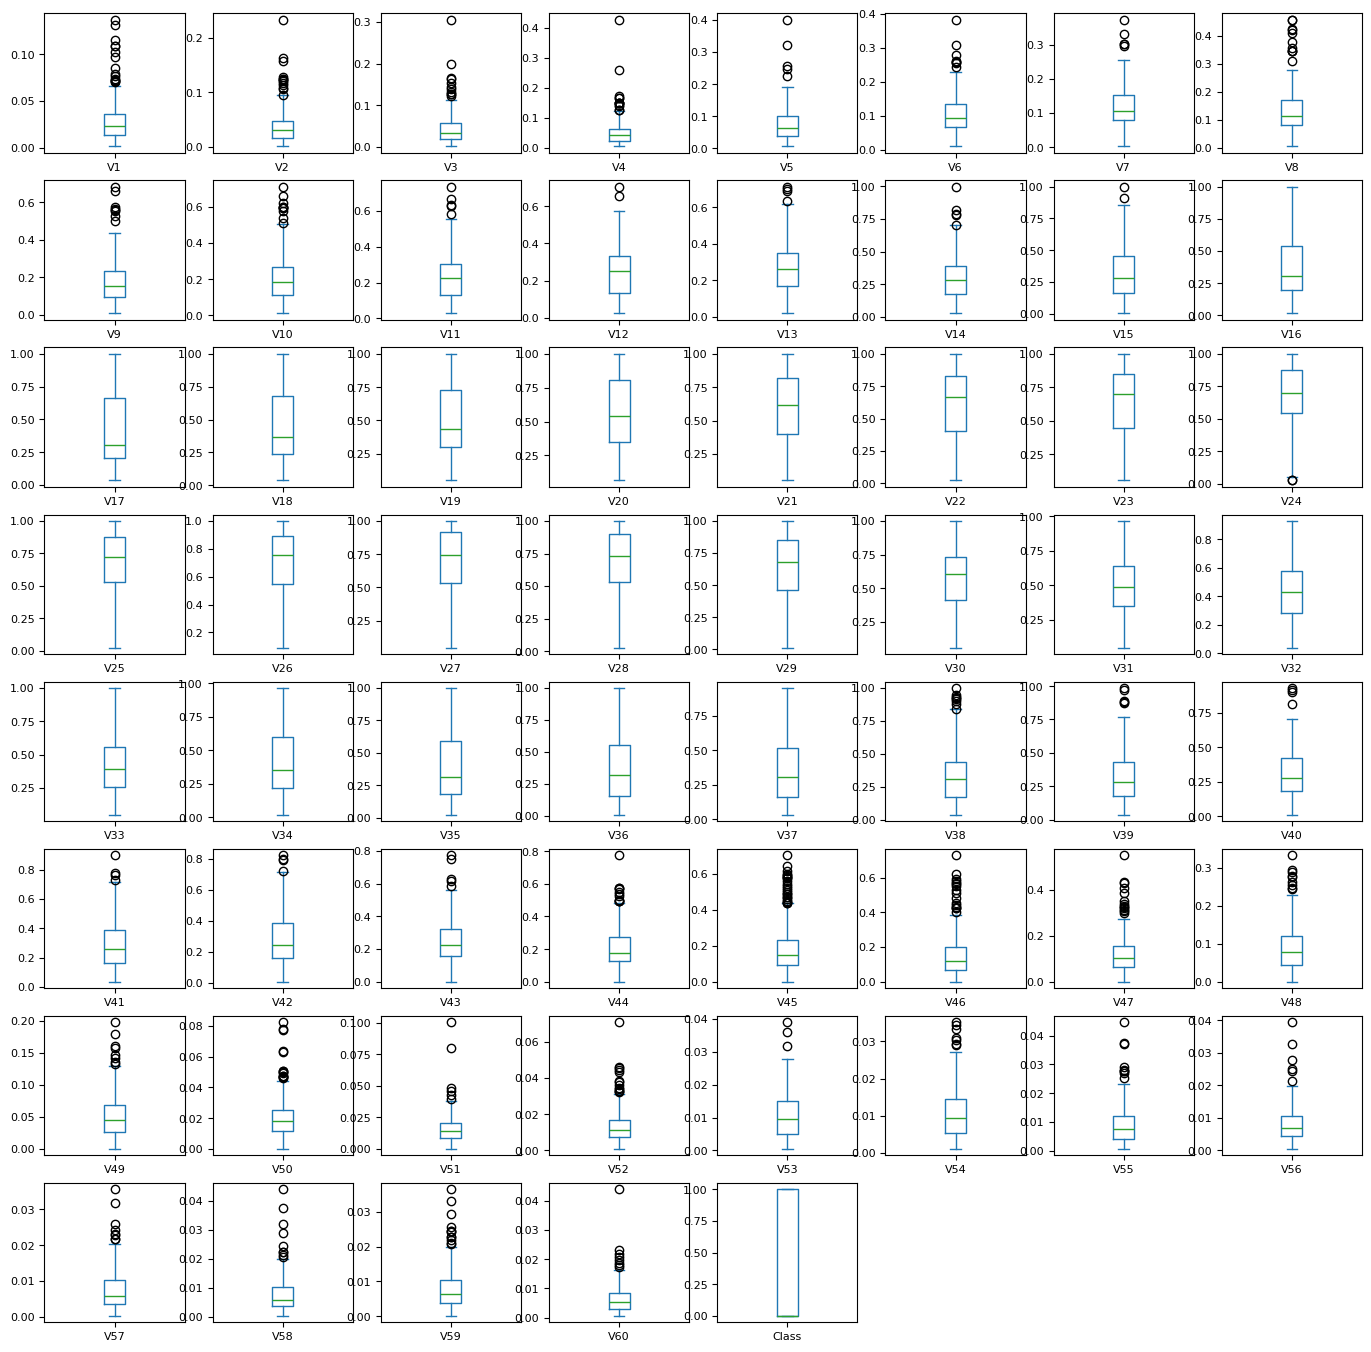

In [71]:
dataset.plot(kind='box', subplots=True, layout=(8, 8), sharex=False, sharey=False, figsize=(17, 17), fontsize=8)
plt.show()

Multi-modal Data Visualizations

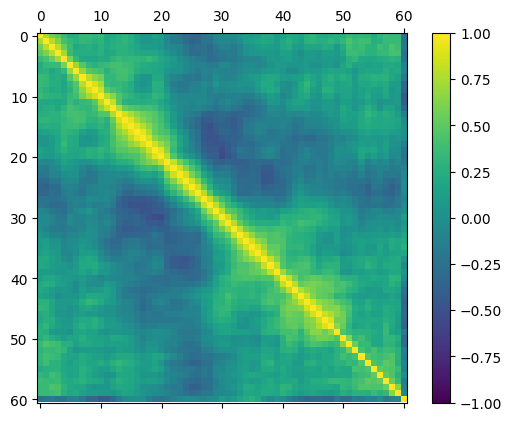

In [76]:
# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
plt.show()

#### Validation Dataset

In [78]:
X = dataset.iloc[:, dataset.columns != 'Class'].values
y = dataset.iloc[:, dataset.columns == 'Class'].values

seed = 7
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

#### Evaluate Algorithms

In [81]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

In [82]:
models = []
# Spot-Check Algorithms
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [83]:
# to remove unecessary warnings
y_train = y_train.ravel() 

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.3f} ({cv_results.std():.3f})")

LR: 0.772 (0.091)
LDA: 0.779 (0.094)
KNN: 0.759 (0.106)
CART: 0.703 (0.111)
NB: 0.683 (0.136)
SVM: 0.765 (0.088)


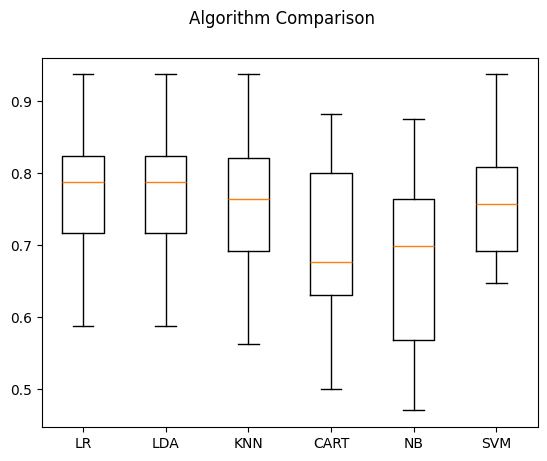

In [84]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Evaluate Algorithms: Standardization

In [90]:
# Standardize the dataset
pipelines = []
pipelines.append(('Scaled-LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('Scaled-LDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('Scaled-KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('Scaled-CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('Scaled-NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('Scaled-SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

In [91]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Scaled-LR: 0.754412 (0.067926)
Scaled-LDA: 0.778676 (0.093570)
Scaled-KNN: 0.808456 (0.107996)
Scaled-CART: 0.709926 (0.081919)
Scaled-NB: 0.682721 (0.136040)
Scaled-SVM: 0.826103 (0.081814)


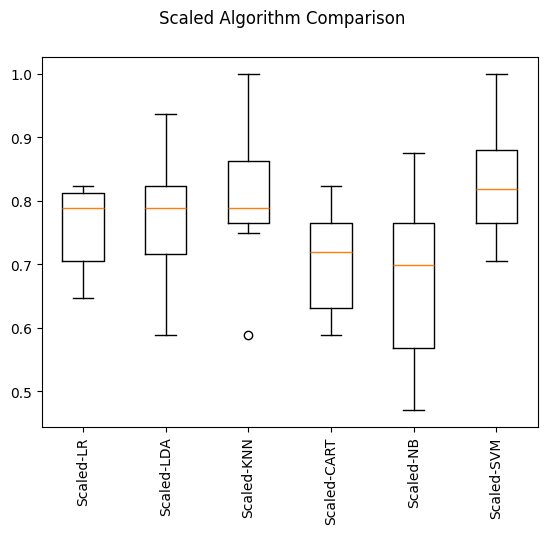

In [92]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

#### Improve Results With Tuning

In [ ]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)

model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -19.497829 using {'n_neighbors': 1}
-19.497829 (15.769847) with: {'n_neighbors': 1}
-19.977984 (13.803973) with: {'n_neighbors': 3}
-21.270967 (14.833544) with: {'n_neighbors': 5}
-21.577292 (14.952592) with: {'n_neighbors': 7}
-21.001075 (14.701297) with: {'n_neighbors': 9}
-21.490306 (14.866957) with: {'n_neighbors': 11}
-21.268533 (14.454969) with: {'n_neighbors': 13}
-21.968092 (14.209894) with: {'n_neighbors': 15}
-22.739880 (14.492752) with: {'n_neighbors': 17}
-23.506901 (14.903224) with: {'n_neighbors': 19}
-24.240303 (15.156565) with: {'n_neighbors': 21}


#### Ensemble Methods 
another way to improve the performance. Here:
- Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
- Bagging Methods: Random Forests (RF) and Extra Trees (ET).

In [ ]:
# ensembles
ensembles = []
ensembles.append(('Scaled-AB', Pipeline([('Scaler', StandardScaler()),('AB',AdaBoostRegressor())])))
ensembles.append(('Scaled-GBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('Scaled-RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('Scaled-ET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))

In [ ]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Scaled-AB: -15.620726 (7.579254)
Scaled-GBM: -10.870139 (8.611010)
Scaled-RF: -11.867114 (8.341954)
Scaled-ET: -9.342519 (6.819478)


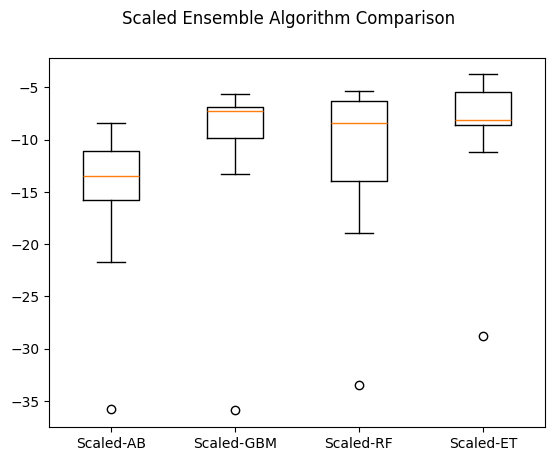

In [ ]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Tune Ensemble Methods

In [ ]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -10.560638 using {'n_estimators': 400}
-11.629999 (8.833221) with: {'n_estimators': 50}
-11.073455 (8.772155) with: {'n_estimators': 100}
-10.838924 (8.734377) with: {'n_estimators': 150}
-10.785568 (8.657244) with: {'n_estimators': 200}
-10.654778 (8.540552) with: {'n_estimators': 250}
-10.649385 (8.497232) with: {'n_estimators': 300}
-10.589337 (8.413596) with: {'n_estimators': 350}
-10.560638 (8.353747) with: {'n_estimators': 400}


#### Finalize Model

In [ ]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, y_train)

GradientBoostingRegressor(n_estimators=400, random_state=7)

In [ ]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(y_test, predictions))

11.902132586880027
